# CNA Homework

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/), select the subreddit of your favorite TV show. Using the data of the selected subreddit, answer the following questions:

In [1]:
#!pip install turicreate

In [2]:
!wget http://dynamics.cs.washington.edu/nobackup/reddit/theoffice.tar.gz

--2022-01-28 07:23:36--  http://dynamics.cs.washington.edu/nobackup/reddit/theoffice.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3550974 (3.4M) [application/x-gzip]
Saving to: ‘theoffice.tar.gz.1’

theoffice.tar.gz.1  100%[===================>]   3.39M  4.76MB/s    in 0.7s    

2022-01-28 07:23:37 (4.76 MB/s) - ‘theoffice.tar.gz.1’ saved [3550974/3550974]



In [3]:
import tarfile
fname = 'theoffice.tar.gz'
tar = tarfile.open(fname, "r:gz")
tar.extractall(path="./data/")
tar.close()

In [4]:
import os
import turicreate as tc 
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

g = tc.SGraph()
graphs_dir = 'data'
sframes_paths = [graphs_dir +'/' + s for s in os.listdir(graphs_dir)]
for folder in tqdm(sframes_paths):
    if not folder.endswith(".sgraph"):
        continue
    subG = tc.load_sgraph(folder)
    g = g.add_vertices(subG.get_vertices())
    g = g.add_edges(subG.get_edges())

  0%|          | 0/49 [00:00<?, ?it/s]

In [5]:
# converv SGraph to networkx, if needed

import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

In [6]:
g = sgraph2nxgraph(g)

*Task 1*: Calculate and visualize the degree distribution of the vertices in the network

In [7]:
import seaborn as sns
from networkx.algorithms.community import greedy_modularity_communities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


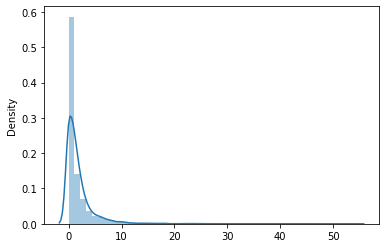

In [8]:
# Get all the degrees
d = g.degree()

# Plot an histogram
sns.distplot([v for v in dict(d).values()]);

*Task 2*: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

In [9]:
d = nx.pagerank(g)
pr_sorted_users = sorted(d.items(), key=lambda e: e[1], reverse=True)
top_20_users = pr_sorted_users[:20]

Let's look at the top 20 users, according to the PageRank algorithm:

In [10]:
top_20_users

[('mdennhardt', 0.004670437344567062),
 ('AlexHeyNa', 0.0035429523228361834),
 ('dayafterxmas', 0.0033305722448263367),
 ('SuperTonicV7', 0.0031198493162439183),
 ('jleya95', 0.0029548718351591033),
 ('CharliesDaniels', 0.00293298950636859),
 ('ShetlandJames', 0.0027938178274697243),
 ('carpii', 0.0026955329475988796),
 ('GrilledCheeser', 0.002693637573758155),
 ('aero23', 0.00258884618119398),
 ('hyoostin', 0.0025868340150216338),
 ('salsaia', 0.002575518939945979),
 ('WhereAreThePix', 0.0023723528895548455),
 ('dailylotion', 0.0023565018034381493),
 ('sulaymanf', 0.002313590951142157),
 ('mmss', 0.002224953524014306),
 ('netshow515', 0.002207506365556165),
 ('vishalb777', 0.002190356375256344),
 ('Unbeatable23', 0.0021480110804541347),
 ('usernamecharlie', 0.0021290857195804002)]

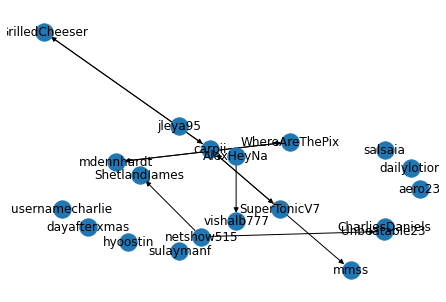

In [11]:
top_20_subgraph = g.subgraph([user[0] for user in top_20_users])
nx.draw_kamada_kawai(top_20_subgraph, with_labels=True)

*Task 3*: Visualize the distribution of the network's strongly and weakly connected components.

* As we didn't have the chance to review this in class, you can read shortly about these terms [here](https://www.geeksforgeeks.org/check-if-a-graph-is-strongly-unilaterally-or-weakly-connected/)
* This might be helpful: [networkx.weakly_connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html?highlight=weakly_connected_components#networkx.algorithms.components.weakly_connected_components) 

In [12]:
wcc = list(nx.weakly_connected_components(g))
scc = list(nx.strongly_connected_components(g))

print(f'Number of weakly connected components: {len(wcc)}')
print(f'Number of strongly connected components: {len(scc)}')

wcc_lengths = list(map(len, wcc))
scc_lengths = list(map(len, scc))

Number of weakly connected components: 1864
Number of strongly connected components: 3612


Let's visualize the weakly connected components distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


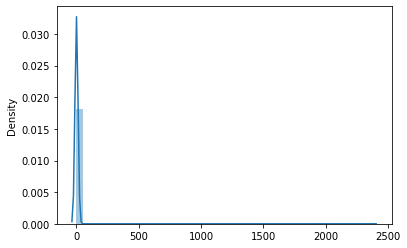

In [13]:
sns.distplot(wcc_lengths);

Let's visualize the strongly connected components distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


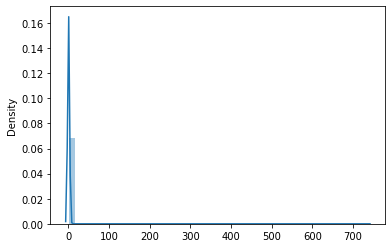

In [14]:
sns.distplot(scc_lengths);

*Task 4*: Split the network into communities, and find the __second__ most central vertex in each community (use degree_centrality).

In [15]:
# Extract communities from our graph
communities = greedy_modularity_communities(g)
print(f'Number of communities: {len(communities)}')

Number of communities: 1900


In [16]:
# Filter all the communities which contain more than 2 nodes
relevant_communities = list(filter(lambda c: len(c) > 2, communities))

# Extract the second most central vertex
for i, community in enumerate(relevant_communities):
  c_graph = g.subgraph(community)
  c_degrees = nx.degree_centrality(c_graph)
  sorted_degrees = sorted(c_degrees.items(), key=lambda e: e[1], reverse=True)
  second_top_user = sorted_degrees[1]

  print(f'Second top user for community {i} is: {second_top_user[0]}')

Second top user for community 0 is: ryanweiskopf
Second top user for community 1 is: SuperTonicV7
Second top user for community 2 is: Andewz111
Second top user for community 3 is: anyways_vs_anyway
Second top user for community 4 is: blitzbom
Second top user for community 5 is: netshow515
Second top user for community 6 is: mdennhardt
Second top user for community 7 is: kzcatlady
Second top user for community 8 is: justined0414
Second top user for community 9 is: dawhitesox14
Second top user for community 10 is: bothanspy1337
Second top user for community 11 is: AlrightStopHammatime
Second top user for community 12 is: dontBatool
Second top user for community 13 is: unfortunatejordan
Second top user for community 14 is: meetmeindisneyland
Second top user for community 15 is: ViceMikeyX
Second top user for community 16 is: MyCatBandit
Second top user for community 17 is: Two-Face
Second top user for community 18 is: Going_to_Pasalacqua
Second top user for community 19 is: cokestar
Secon

## Part 2

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [17]:
import networkx as nx
from scipy.stats import spearmanr
from networkx.generators.geometric import random_geometric_graph

In [18]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]

In [19]:
nets = [nx.generators.community.stochastic_block_model(blocks,p) for p in probs*100]
print("There are {} networks in total.".format(len(nets)))

There are 300 networks in total.


### Node centrality 
Your code is here: replace [] accordingly to the comment in the row



In [20]:
centralities =  [ {
                    'degree': list(nx.degree_centrality(G).values()), #replace [] with a sequence of node degree centralities 
                    'closeness': list(nx.closeness_centrality(G).values()), #replace [] with a sequence of node closeness centralities  
                    'betweenness': list(nx.betweenness_centrality(G).values()) #replace [] with a sequence of node betweenness centralities
                  } 
                for G in nets
                ]

In [21]:
#here we compute the corralations between the three centrality measures for each network
#every network is characterized by the tripplet of centrality correlations
centrality_correlations = [
    (
        spearmanr(c['degree'],c['closeness'])[0],
        spearmanr(c['degree'],c['betweenness'])[0],
        spearmanr(c['betweenness'],c['closeness'])[0],
    )
    for c in centralities
]

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [22]:
radius = 0.025
G = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [23]:
print("number of nodes in G is the same as the number of networks in nets:{}".format(G.number_of_nodes()))
print("number of edges in G is:{}".format(G.number_of_edges()))

number of nodes in G is the same as the number of networks in nets:300
number of edges in G is:10805


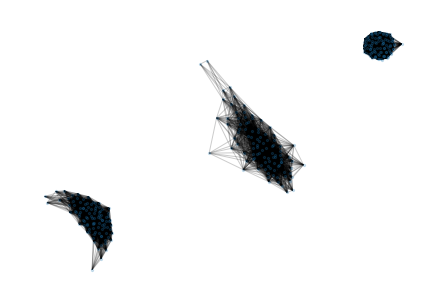

In [24]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos,node_size=5,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]?
- Use _greedy_modularity_communities_

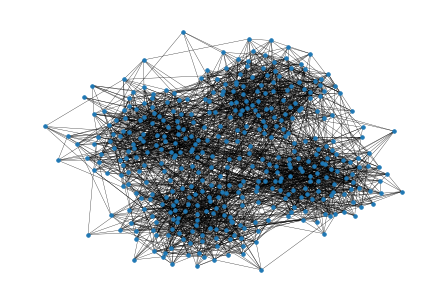

In [25]:
nx.draw(nets[1], with_labels = False, node_size=12, width=0.3) 

In [26]:
nets_communities = greedy_modularity_communities(nets[1])
len(nets_communities)
#find the community structure of nets[1] and print the number of communities in nets[1]

4

#### How could you know it without running community detection?

There are four blocks with nodes tightly connected within the blocks (prob=0.1) and loosely connected between the blocks (prob=0.01). And just by visual analysis of the graph above, we also can see 4 areas which have dense connections, in comparison to other areas.

#### What is the number of communities in the meta-network G?

In [27]:
# Find the number of communities in G
meta_communities = greedy_modularity_communities(G)
len(meta_communities)

3

#### Can you explain why this is the number of communities in G? 

From the look at the meta-network graph, we can see that there are 3 distinct communities which are very far from each other. It can be explained by the construction of the meta-network: there are 3 types of networks with a similar correlation structure (depending on 3 types of probabilities in the "probs" variable).